In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import tensorflow as tf

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [42]:
train = pd.read_csv("sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test.csv")

In [43]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [44]:
train[train['label']==24]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
26,24,148,153,156,157,158,158,158,158,160,...,184,185,184,181,181,179,175,173,171,167
130,24,182,182,182,183,183,184,184,184,184,...,181,137,150,175,193,201,192,174,156,181
140,24,85,93,99,106,114,120,123,126,128,...,188,189,192,193,194,194,194,195,195,195
164,24,160,164,168,173,174,176,180,182,182,...,127,126,125,125,130,178,231,218,200,174
213,24,124,126,130,131,132,134,136,137,138,...,162,162,162,163,163,162,161,161,162,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27325,24,170,171,173,174,177,179,181,182,184,...,209,203,205,206,206,206,207,207,206,206
27371,24,168,173,178,180,183,188,189,190,191,...,229,225,224,221,219,220,219,216,215,214
27378,24,211,213,213,215,216,216,217,217,217,...,255,255,255,255,255,255,255,187,127,114
27407,24,212,212,212,212,213,214,213,213,213,...,99,92,89,82,80,67,71,83,64,71


In [45]:
train['label'].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [46]:
# Change label to alphabets
alphabets_mapper = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'} 
dataset_alphabets = train.copy()
train['label'] = train['label'].map(alphabets_mapper)


In [47]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,D,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,G,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,C,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,C,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,N,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


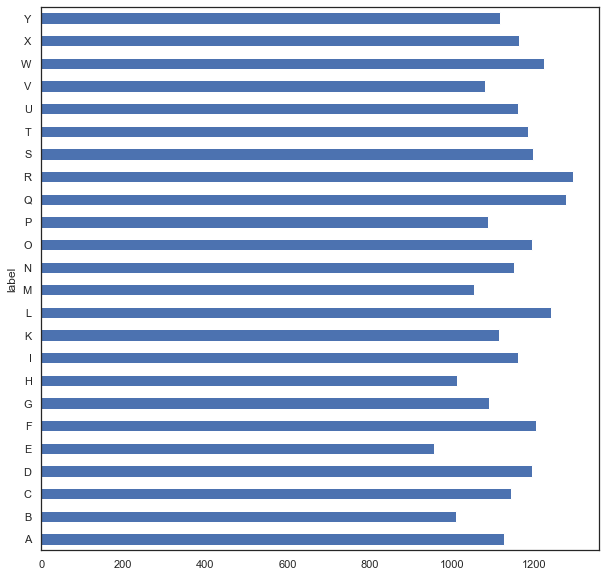

In [48]:
label_size = train.groupby('label').size()
label_size.plot.barh(figsize=(10,10))
plt.show()

In [49]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [50]:
train_data = pd.read_csv("sign_mnist_train.csv")
Y_train_data = train_data["label"]
X_train_data = train_data.drop(labels = ["label"],axis = 1) 

In [51]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [52]:
# Normalize the data
X_train_data = X_train_data / 255.0

In [53]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train_data = X_train_data.values.reshape(-1,28,28,1)

In [54]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train_data = to_categorical(Y_train_data, num_classes = 26)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


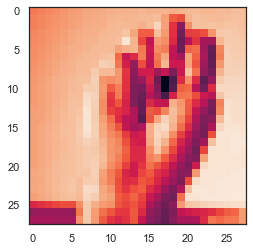

In [57]:
g = plt.imshow(X_train_data[4][:,:,0])
print(Y_train_data[4])